# Bioinformática y Análisis Genómico
# 4º curso Grado en Bioquímica - Mención en Biotecnología
# Curso 2020/2021
## Práctica 5: Plegado de proteinas 2D
### Profesor: Ignacio Pérez Hurtado de Mendoza
### perezh@us.es
### http://www.cs.us.es/~ignacio

## Plegado de proteinas 2D

Los primeros modelos de plegamiento de proteínas (Shakhnovich & Gutin, 1993; Dill et al., 1995; Moreno-Hernandez & Levitt, 2012), usaron un alfabeto reducido en donde los aminoácidos son polares o hidrofóbicos y donde las cadenas se pliegan en una malla bidimensional. En general se acepta que estos modelos reproducen las características más importantes del proceso de plegamiento real con la ventaja de ser más manejables.

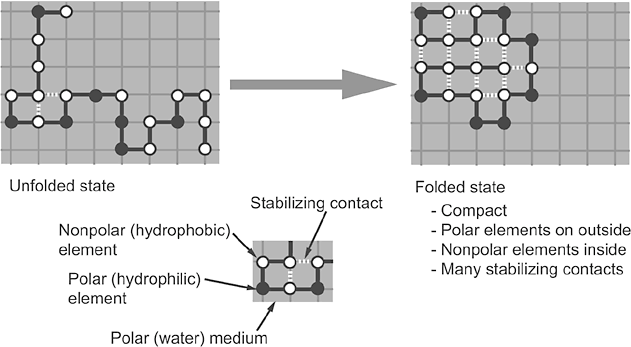


En esta práctica vamos a implementar un sencillo algoritmo de plegamiento de proteinas en 2D en base a la hidrofobicidad de los aminoácidos.

* Una proteina con información espacial vendrá definida por una tupla de dos cadenas de texto con la misma longitud. La primera cadena contendrá los símbolos de los aminoácidos de la proteina y la segunda cadena tendrá símbolos de entre {I,N,S,E,W} que representarán la estructura de la proteina mediante la posición relativa de cada aminoácido con respecto al anterior (Norte, Sur, Este, Oeste), el caracter I se reserva para el aminoácido inicial. Por ejemplo: ('PEPTIDE','IEENNWS') representa la siguiente estructura:

* Si hay solapamientos espaciales, la estructura es inválida, por ejemplo: ('PEPTIDE', 'IEENWWS').

* La estructura de la proteina se puntuará de acuerdo a la hidrofobicidad de los aminoácidos y los elementos adyacentes a cada aminoácido (más adelante se explica cómo).

* Se trata de un problema de optimización que se resolverá mediante el algoritmo *Simulating annealing*

## Ejercicio 1

Dada una proteina con información espacial, vamos a construir un diccionario que represente la información de una forma que nos facilite el análisis. Las claves de dicho diccionario serán tuplas de dos números enteros representando coordenadas espaciales y los valores serán letras de aminoácidos. El primer aminoácido siempre se colocará en las coordenadas (0,0) y los siguientes se colocarán según las posiciones relativas. Por ejemplo: La proteina ('PEPTIDE','IEENNWS') dará lugar al siguiente diccionario:

{(0,0): 'P', (1,0): 'E', (2,0): 'P', (2,1): 'T', (2,2): 'I',
 (1,2): 'D', (1,1): 'E'}
 
Se pide implementar una función **get_spatial_dic(protein, structure)** que recibe una cadena representando una proteina y otra cadena representando su estructura y devuelve el diccionario explicado anteriormente o un diccionario vacío si existen solapamientos. 
 


In [13]:
#def get_spatial_dic(protein,structure):
    #inicializo las posiciones y el dic
    #por cada letra de la proteina y la estructura... 
    #pista: mirar como se hace un for usando la funcion zip para agrupar dos
    #elementos e iterarlos a la vez
        #modificar pos1 y pos2 según que letra haya en structure
        #Sí, hay que usar muchos if-elif
        #guardo pos1 y pos 2 en un objeto de clase tupla ()   
        #checkeo si la pos obtenida ya existe en el dic
            #si es así, devolver un dic vacío
        #si no, guardar la pos como clave y como valor el aminoacido en el dic
    #devolver dic

def get_spatial_dic(protein,structure):
    posx,posy = 0,0
    dic = {}
    for (a,b) in zip(protein,structure):
        if b == 'N':
            posy+=1
        elif b == 'S':
            posy-=1
        elif b == 'E':
            posx+=1
        elif b == 'W':
            posx-=1
        pos = (posx,posy)
        if pos in dic:
           return({})
        else:
            dic[pos] = a
    return dic

In [14]:
# Pruebas
print(get_spatial_dic('PEPTIDE','IEENNWS'))
print(get_spatial_dic('PEPTIDE','IEENWWS'))

{(0, 0): 'P', (1, 0): 'E', (2, 0): 'P', (2, 1): 'T', (2, 2): 'I', (1, 2): 'D', (1, 1): 'E'}
{}


## Ejercicio 2


Los aminoácidos se pueden clasificar en función de su solubilidad como:

* Hidrofílicos: aminoácidos polares y con tendencia a asociarse con el agua.

* Hidrofóbicos: aminoácidos apolares con tendencia a repeler el agua.

La solubilidad de los aminoácidos se mide calculando la variación de Energía Libre en contacto con agua a pH = 7.
 
Se define hidropatía como la variación de Energía Libre (ΔG) asociada a la transferencia del aminoácidos desde una solución orgánica a otra acuosa.

A continuación se facilita un diccionarios con los 20 aminoácidos  y sus correspondientes valores de la variación de Energía libre:

In [15]:
aa_deltaG = {
 'A': 1,    # Alanine
 'C': 0.17, # Cysteine
 'D': -3,   # Aspartic Acid
 'E': -2.6, # Glutamic Acid
 'F': 2.5,  # Phenylalanine
 'G': 0.67, # Glycine
 'H': -1.7, # Histidine
 'I': 3.1,  # Isoleucine
 'K': -4.6, # Lysine
 'L': 2.2,  # Leucine
 'M': 1.1,  # Methionine
 'N': -2.7, # Asparagine
 'P': -0.29,# Proline
 'Q': -2.9, # Glutamine
 'R': -7.5, # Arginine
 'S': -1.1, # Serine
 'T': -0.75,# Threonine
 'V': 2.3,  # Valine
 'W': 1.5,  # Tryptophan
 'Y': 0.08  # Tyrosine
} 

### Ejercicio 2.1
Se pide implementar una función **is_hydrophobic(aa)** que recibe un aminoácido y devuelve **True** si su ΔG es mayor de -1.5, **False** en caso contrario.

In [16]:
def is_hydrophobic(aa):
     return aa_deltaG[aa]> -1.5

In [17]:
#pruebas
print(is_hydrophobic('A'))
#True
print(is_hydrophobic('S'))
#True
print(is_hydrophobic('R'))
#False
print(is_hydrophobic('H'))
#False

True
True
False
False


Cada aminoácido tiene 4 posiciones adyacentes (N,S,E,W), si alguna de esas posiciones no está ocupada por otro aminoácido, se entiende que es una posición libre ocupada por el medio acuoso. 

La puntuación de un aminoácido será:

* ΔG * N si el aminoácido no es hidrofóbico
* ΔG * N + 10 * N si el aminoácido es hidrofóbico

En dónde N es el número de posiciones adyacentes libres.

La puntuación de la proteina es el sumatorio de las puntuaciones de sus aminoácidos. Cuanto menor sea esta puntuación, más aminoácidos hidrofílicos se encontrarán en contacto con el medio. Intentaremos por tanto minimizar esta puntuación.


### Ejercicio 2.2
Se pide implementar una función **get_score(dic)** que reciba un diccionario representando la estructura espacial de una proteina y devuelva su puntuación.

In [18]:
def get_score(dic):
    score_total = 0
    modificaciones= [(0,1),(0,-1),(1,0),(-1,0)]
    for (posx,posy) in dic:
        for (c,d) in modificaciones:
            if (posx+c,posy+d) not in dic:
                score_total += aa_deltaG[dic[(posx,posy)]]
                if is_hydrophobic(dic[(posx,posy)]):
                    score_total += 10
    return score_total


In [19]:
def get_score2(dic):
    score_total = 0
    for pos_real in dic:
        N=0
        posx = pos_real[0]
        posy = pos_real[1]
        if (posx-1,posy) not in dic:
            N+=1
        if (posx+1,posy) not in dic:
            N+=1
        if (posx, posy-1) not in dic:
            N+=1
        if (posx,posy+1) not in dic: 
            N+=1
            
        if is_hydrophobic(dic[pos_real]):
            score_total += (aa_deltaG[dic[pos_real]] * N) + (10*N)
        else:
            score_total += (aa_deltaG[dic[pos_real]] * N)
    return score_total

In [20]:
# pruebas
print(get_score2(get_spatial_dic('PEPTIDE','IEENNWS')))
# 72.80000000000001
print(get_score(get_spatial_dic('PEPTIDE','IEEEEEE')))
# 74.25000000000001
print(get_score(get_spatial_dic('PEPTIDE','IEENWWN')))
# 57.04

72.80000000000001
74.25000000000001
57.04


## Ejercicio 3

Dada una proteina y su estructura, podemos realizar un plegado en 90 o -90 grados a partir de la posición i de la siguiente forma:

* Si es 90 grados: Realizar las siguientes transformaciones en la estructura a partir de la posición i:
    - N -> W
    - S -> E
    - E -> N
    - W -> S
    

* Si es -90 grados: Realizar las siguientes transformaciones en la estructura a partir de la posición i:
    - N -> E
    - S -> W
    - E -> S
    - W -> N
    
Se pide implementar una función **fold(structure, pos, angle)** que recibe una estructura, una posición de plegado (empezando por 0) y el ángulo que puede ser 90 o -90, devuelve una nueva estructura tras aplicar el plegado.

*Nota*: No nos preocuparemos de si el resultado es válido


In [21]:
#def fold(structure,pos,angle):
    #hago un diccionario con la transformacion de cada coordenada +90 y -90
      #si el angulo es 90 selecciono como current_dic al diccionario +90
      #si el angulo es -90 selecciono como current_dic al diccionario -90
    #inicializo una cadena de caracteres donde voy a guardar mi resultado
    #recorro desde la posicion 0 hasta la pos elegida para el pliegue
        #almaceno en resultado cada una de las coordenadas que hay en structure
    #recorro desde la posicion elegida para el pliegue hasta el final de la estructura
        #busco en el current_dic la coordenada de estructure transformada a al angulo nuevo
    #devuelvo resultado

def fold(structure,pos,angle):
    dic90 = {'N': 'W', 'S' : 'E', 'E' : 'N' , 'W' : 'S' }
    dicmenos90 = {'N': 'E', 'S' : 'W', 'E' : 'S' , 'W' : 'N' }
    if angle == 90:
        current_dic = dic90
    else:
        current_dic = dicmenos90
        
    resultado = ''
    #for i in range(0,pos):
    #    resultado += structure[i]
        
    for orientacion in structure[:pos]:
        resultado += orientacion
    for orientacion in structure[pos:]:
        resultado += current_dic[orientacion]
    return resultado


In [22]:
#pruebas
print(fold('IEEEEEE',4,90))
# IEEENNN

print(fold('IEEEEEE',4,-90))
# IEEESSS

print(fold('IEENNWS',4,-90))
# IEENENW

print(fold('IEENNWS',5,-90))
# IEENNNW

IEEENNN
IEEESSS
IEENENW
IEENNNW


## Ejercicio 4

Se pide implementar una función **get_successors(protein,structure)** que dada una proteina y su estructura, devuelva una diccionario cuyas claves son las posibles estructuras **validas** tras aplicar todos los posibles plegamientos y cuyos valores sean los correspondientes diccionarios espaciales obtenidos con **get_spatial_dic**. Para obtener todos los posibles plegamientos se iterará la posición desde 1 hasta el final de la estructura y para cada posición se aplicarán los plegamientos en 90 y -90 grados, luego se comprobará si el diccionario espacial tiene datos (es válido) para añadirlo al resultado.

In [23]:
#def get_successors(protein,structure):
    #Inicializo mi dic resultado vacio
    #recorro la estructura
        #recorro una lista con los angulos posibles [90,-90]
            #uso la funcion fold y doblo en esa posicion con cada uno de los angulos
            #uso la funcion get_spatial_dic que va a devolver las coordenadas o un dic vacio si la estructura no es posible
            #si el diccionario con las coordenadas no está vacío...
                #guardo en resultado ese diccionario con las coordenadas posibles para el plegamiento
                #OJO! resultado lo iniciamos como diccionario vacio, lo que queremos es rellenarlo
                #usando como claves las estructuras y como valores lo que devuelve get spatial dic de esa estructura
                #Ejemplo: {"ISSENNE":{(0, 0): 'P', (0, -1): 'E', (0, -2): 'P', (1, -2): 'T', (1, -1): 'I', (1, 0): 'D',(2, 0): 'E'},
                #          "INNWSSW": {(0, 0): 'P', (0, 1): 'E',(0, 2): 'P',(-1, 2): 'T',(-1, 1): 'I',(-1, 0): 'D',(-2, 0): 'E'}
                #es un diccionario con strings como claves y diccionarios como valores (no hay que hacer ninguna transformacion, es
                #una cosa comun y valida)
    #devuelve resultado

def get_successors(protein,structure):
    resultado = {}
    for i in range(1,len(structure)):
        for angle in [-90,90]:
            s = fold(structure,i,angle)
            dic = get_spatial_dic(protein,s)
            if len(dic)>0:
                resultado[s] = dic
    return resultado


In [24]:
#Pruebas
get_successors('PEPTIDE','IEENWWN')

#{'ISSENNE': {(0, 0): 'P',
#  (0, -1): 'E',
#  (0, -2): 'P',
#  (1, -2): 'T',
#  (1, -1): 'I',
#  (1, 0): 'D',
#  (2, 0): 'E'},
# 'INNWSSW': {(0, 0): 'P',
#  (0, 1): 'E',
#  (0, 2): 'P',
#  (-1, 2): 'T',
#  (-1, 1): 'I',
#  (-1, 0): 'D',
#  (-2, 0): 'E'},
# 'IESENNE': {(0, 0): 'P',
#  (1, 0): 'E',
#  (1, -1): 'P',
#  (2, -1): 'T',
#  (2, 0): 'I',
#  (2, 1): 'D',
#  (3, 1): 'E'},
# 'IEEENNE': {(0, 0): 'P',
#  (1, 0): 'E',
#  (2, 0): 'P',
#  (3, 0): 'T',
#  (3, 1): 'I',
#  (3, 2): 'D',
#  (4, 2): 'E'},
# 'IEENNNE': {(0, 0): 'P',
#  (1, 0): 'E',
#  (2, 0): 'P',
#  (2, 1): 'T',
#  (2, 2): 'I',
#  (2, 3): 'D',
#  (3, 3): 'E'},
# 'IEENWNE': {(0, 0): 'P',
#  (1, 0): 'E',
#  (2, 0): 'P',
#  (2, 1): 'T',
#  (1, 1): 'I',
#  (1, 2): 'D',
#  (2, 2): 'E'},
# 'IEENWWW': {(0, 0): 'P',
#  (1, 0): 'E',
#  (2, 0): 'P',
#  (2, 1): 'T',
#  (1, 1): 'I',
#  (0, 1): 'D',
#  (-1, 1): 'E'}}

{'ISSENNE': {(0, 0): 'P',
  (0, -1): 'E',
  (0, -2): 'P',
  (1, -2): 'T',
  (1, -1): 'I',
  (1, 0): 'D',
  (2, 0): 'E'},
 'INNWSSW': {(0, 0): 'P',
  (0, 1): 'E',
  (0, 2): 'P',
  (-1, 2): 'T',
  (-1, 1): 'I',
  (-1, 0): 'D',
  (-2, 0): 'E'},
 'IESENNE': {(0, 0): 'P',
  (1, 0): 'E',
  (1, -1): 'P',
  (2, -1): 'T',
  (2, 0): 'I',
  (2, 1): 'D',
  (3, 1): 'E'},
 'IEEENNE': {(0, 0): 'P',
  (1, 0): 'E',
  (2, 0): 'P',
  (3, 0): 'T',
  (3, 1): 'I',
  (3, 2): 'D',
  (4, 2): 'E'},
 'IEENNNE': {(0, 0): 'P',
  (1, 0): 'E',
  (2, 0): 'P',
  (2, 1): 'T',
  (2, 2): 'I',
  (2, 3): 'D',
  (3, 3): 'E'},
 'IEENWNE': {(0, 0): 'P',
  (1, 0): 'E',
  (2, 0): 'P',
  (2, 1): 'T',
  (1, 1): 'I',
  (1, 2): 'D',
  (2, 2): 'E'},
 'IEENWWW': {(0, 0): 'P',
  (1, 0): 'E',
  (2, 0): 'P',
  (2, 1): 'T',
  (1, 1): 'I',
  (0, 1): 'D',
  (-1, 1): 'E'}}

## Ejercicio 5

A continuación se presenta implementado el algoritmo de *Simulating Annealing* para resolver el problema del plegado 2D como un problema de optimización, analizar el código:

In [25]:
import random
from math import e
def simulating_annealing(protein, tInit = 100, factor = 0.95, nCoolings = 100, nIters = 100):
    temperature = tInit #T inicial
    currentState = (protein, 'I'+'E'*(len(protein)-1)) #Estructura inicial
    currentScore = get_score(get_spatial_dic(*currentState)) #Score inicial
    bestState = currentState #estructura que mejorar
    bestScore = currentScore #Score que mejorar
    for i in range(0,nCoolings):
        print('Temperature ',temperature,' Best score: ',bestScore)
        for j in range(0,nIters):
            candidate = fold(currentState[1],
                             random.randint(1,len(protein)),
                             -90+random.randint(0,1)*180)
            dic = get_spatial_dic(protein,candidate)
            while (len(dic)==0):
                candidate = fold(currentState[1],
                             random.randint(1,len(protein)),
                             -90+random.randint(0,1)*180)
                dic = get_spatial_dic(protein,candidate)
            candidateScore = get_score(dic)
            scoreDiff = candidateScore - currentScore
            if scoreDiff < 0:
                candidateProb = 1.0
            else:
                candidateProb = e**(-scoreDiff/temperature)
            if random.random()<candidateProb:
                currentState = (protein,candidate)
                currentScore = candidateScore
                if currentScore < bestScore:
                    bestState = currentState
                    bestScore = currentScore
        temperature*= factor
    return bestState     
    
    

In [26]:

# La siguiente secuencia se corresponde con el receptor olfativo
# de Homo Sapiens, siendo una proteina transmembranal
# Accesion Number Uniprot: Q8NHC7
#mirar como sacar seq de uniprot
Q8NHC7='MPNSTTVMEFLLMRFSDVWTLQILHSASFFMLYLVTLMGNILIVTVTTCDSSLHMPMYFFLRNLSILDACYISVTVPTSCVNSLLDSTTISKAGCVAQVFLVVFFVYVELLFLTIMAHDRYVAVCQPLHYPVIVNSRICIQMTLASLLSGLVYAGMHTGSTFQLPFCRSNVIHQFFCDIPSLLKLSCSDTFSNEVMIVVSALGVGGGCFIFIIRSYIHIFSTVLGFPRGADRTKAFSTCIPHILVVSVFLSSCSSVYLRPPAIPAATQDLILSGFYSIMPPLFNPIIYSLRNKQIKVAIKKIMKRIFYSENV'

result = simulating_annealing(Q8NHC7,100,0.99,500,500)


Temperature  100  Best score:  5233.380000000006
Temperature  99.0  Best score:  3799.3400000000047
Temperature  98.01  Best score:  3799.3400000000047
Temperature  97.0299  Best score:  3741.3900000000026
Temperature  96.059601  Best score:  3741.3900000000026
Temperature  95.09900499  Best score:  3700.2200000000034
Temperature  94.1480149401  Best score:  3700.2200000000034
Temperature  93.206534790699  Best score:  3700.2200000000034
Temperature  92.27446944279201  Best score:  3700.2200000000034
Temperature  91.35172474836409  Best score:  3700.2200000000034
Temperature  90.43820750088045  Best score:  3700.2200000000034
Temperature  89.53382542587164  Best score:  3700.2200000000034
Temperature  88.63848717161292  Best score:  3687.4600000000023
Temperature  87.75210229989679  Best score:  3683.3400000000015
Temperature  86.87458127689783  Best score:  3683.3400000000015
Temperature  86.00583546412885  Best score:  3377.0400000000022
Temperature  85.14577710948755  Best score:  3

Temperature  27.075425951199424  Best score:  2277.0300000000016
Temperature  26.804671691687428  Best score:  2277.0300000000016
Temperature  26.536624974770554  Best score:  2277.0300000000016
Temperature  26.271258725022847  Best score:  2277.0300000000016
Temperature  26.00854613777262  Best score:  2277.0300000000016
Temperature  25.748460676394892  Best score:  2277.0300000000016
Temperature  25.490976069630943  Best score:  2277.0300000000016
Temperature  25.23606630893463  Best score:  2277.0300000000016
Temperature  24.983705645845284  Best score:  2277.0300000000016
Temperature  24.73386858938683  Best score:  2277.0300000000016
Temperature  24.48652990349296  Best score:  2277.0300000000016
Temperature  24.24166460445803  Best score:  2277.0300000000016
Temperature  23.99924795841345  Best score:  2277.0300000000016
Temperature  23.759255478829314  Best score:  2277.0300000000016
Temperature  23.52166292404102  Best score:  2166.960000000003
Temperature  23.28644629480061  B

Temperature  7.479631572685259  Best score:  1505.6999999999996
Temperature  7.404835256958406  Best score:  1505.6999999999996
Temperature  7.330786904388821  Best score:  1505.6999999999996
Temperature  7.257479035344933  Best score:  1505.6999999999996
Temperature  7.1849042449914835  Best score:  1505.6999999999996
Temperature  7.1130552025415685  Best score:  1505.6999999999996
Temperature  7.041924650516153  Best score:  1505.6999999999996
Temperature  6.971505404010991  Best score:  1505.6999999999996
Temperature  6.901790349970882  Best score:  1505.6999999999996
Temperature  6.832772446471173  Best score:  1505.6999999999996
Temperature  6.764444722006462  Best score:  1505.6999999999996
Temperature  6.696800274786397  Best score:  1505.6999999999996
Temperature  6.6298322720385325  Best score:  1505.6999999999996
Temperature  6.563533949318147  Best score:  1505.6999999999996
Temperature  6.497898609824966  Best score:  1505.6999999999996
Temperature  6.432919623726716  Best 

Temperature  2.0662606957299547  Best score:  1505.6999999999996
Temperature  2.045598088772655  Best score:  1505.6999999999996
Temperature  2.0251421078849283  Best score:  1505.6999999999996
Temperature  2.004890686806079  Best score:  1505.6999999999996
Temperature  1.9848417799380185  Best score:  1505.6999999999996
Temperature  1.9649933621386382  Best score:  1505.6999999999996
Temperature  1.9453434285172517  Best score:  1505.6999999999996
Temperature  1.9258899942320793  Best score:  1505.6999999999996
Temperature  1.9066310942897584  Best score:  1505.6999999999996
Temperature  1.8875647833468607  Best score:  1505.6999999999996
Temperature  1.868689135513392  Best score:  1505.6999999999996
Temperature  1.8500022441582582  Best score:  1505.6999999999996
Temperature  1.8315022217166756  Best score:  1505.6999999999996
Temperature  1.8131871994995088  Best score:  1505.6999999999996
Temperature  1.7950553275045138  Best score:  1505.6999999999996
Temperature  1.7771047742294

In [45]:
#vemos que se trata de una tupla con dos elementos, la sequencia y la estructura
result

('MPNSTTVMEFLLMRFSDVWTLQILHSASFFMLYLVTLMGNILIVTVTTCDSSLHMPMYFFLRNLSILDACYISVTVPTSCVNSLLDSTTISKAGCVAQVFLVVFFVYVELLFLTIMAHDRYVAVCQPLHYPVIVNSRICIQMTLASLLSGLVYAGMHTGSTFQLPFCRSNVIHQFFCDIPSLLKLSCSDTFSNEVMIVVSALGVGGGCFIFIIRSYIHIFSTVLGFPRGADRTKAFSTCIPHILVVSVFLSSCSSVYLRPPAIPAATQDLILSGFYSIMPPLFNPIIYSLRNKQIKVAIKKIMKRIFYSENV',
 'ISSWWSEESWWWNWWNWSSWWWNNNESSENNNWNNWNWSWWNWWWWWNEEENEENWNNNNWSWWNENEEESSSSESSENNESSSENNNESSSSSENESESESWWSEEEENNNESENNNNWSWSWWNENNNNWSWWSSSWNNNNWWWWWNENWNNEESSSENEENWNENESSSSSENEENWWNENNESSENNESSSWSESWSEENNNENWNNEESESWSESWSESSSSWSEESWWWSEEESWWWWSSSSENNNEEEEEEESESWSWNWNWWWWSSENEESWSWWWWWWWSESENEEEESWSESEENWNNENEN')

In [14]:

result= ('MPNSTTVMEFLLMRFSDVWTLQILHSASFFMLYLVTLMGNILIVTVTTCDSSLHMPMYFFLRNLSILDACYISVTVPTSCVNSLLDSTTISKAGCVAQVFLVVFFVYVELLFLTIMAHDRYVAVCQPLHYPVIVNSRICIQMTLASLLSGLVYAGMHTGSTFQLPFCRSNVIHQFFCDIPSLLKLSCSDTFSNEVMIVVSALGVGGGCFIFIIRSYIHIFSTVLGFPRGADRTKAFSTCIPHILVVSVFLSSCSSVYLRPPAIPAATQDLILSGFYSIMPPLFNPIIYSLRNKQIKVAIKKIMKRIFYSENV', 'IENWWSSWNNWSSWSSENESENENESSWSWWWWWNWNENWWNWSWSEESSESEEESESWSESWSWNNNNWWWSSSENESSSWNWWNNNWSWSESWSEESWWSEEENESEENNESSSWWSWWSWSWNWSWNNWSSSWWNENNNENNNENWWNNESENNWWNEENWNNNWWSSSWSESSSSSESSWSSSWWNENNNNNNNWWNNWWSSESEESWSSSSSWNNNNWSSWWSESWWNWNENEENNENWWSWNWNENESENNNWSWWWSSSSSWNNWWWNEEENWWNEENEENWWNWSSWWSSWSSSWWNENNNNES' )
result

('MPNSTTVMEFLLMRFSDVWTLQILHSASFFMLYLVTLMGNILIVTVTTCDSSLHMPMYFFLRNLSILDACYISVTVPTSCVNSLLDSTTISKAGCVAQVFLVVFFVYVELLFLTIMAHDRYVAVCQPLHYPVIVNSRICIQMTLASLLSGLVYAGMHTGSTFQLPFCRSNVIHQFFCDIPSLLKLSCSDTFSNEVMIVVSALGVGGGCFIFIIRSYIHIFSTVLGFPRGADRTKAFSTCIPHILVVSVFLSSCSSVYLRPPAIPAATQDLILSGFYSIMPPLFNPIIYSLRNKQIKVAIKKIMKRIFYSENV',
 'IENWWSSWNNWSSWSSENESENENESSWSWWWWWNWNENWWNWSWSEESSESEEESESWSESWSWNNNNWWWSSSENESSSWNWWNNNWSWSESWSEESWWSEEENESEENNESSSWWSWWSWSWNWSWNNWSSSWWNENNNENNNENWWNNESENNWWNEENWNNNWWSSSWSESSSSSESSWSSSWWNENNNNNNNWWNNWWSSESEESWSSSSSWNNNNWSSWWSESWWNWNENEENNENWWSWNWNENESENNNWSWWWSSSSSWNNWWWNEEENWWNEENEENWWNWSSWWSSWSSSWWNENNNNES')

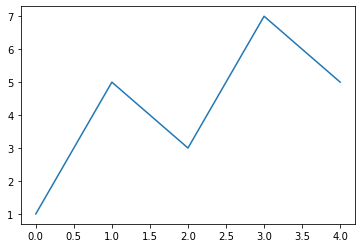

In [4]:
#importamos paquete de representación grafica: pyplot
from matplotlib import pyplot

#pip install matplotlib
#Comentamos estas pruebas en clase
pyplot.plot([1,5,3,7,5])

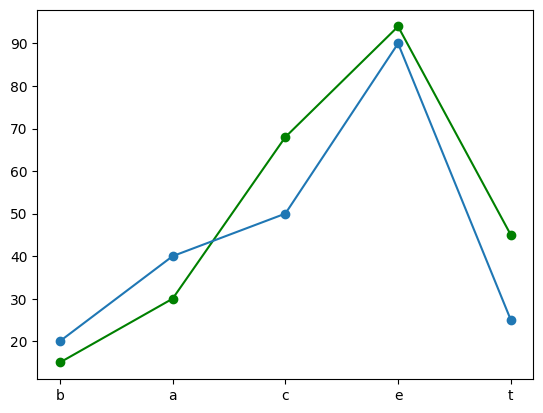

In [48]:
pyplot.plot(["b","a","c","e","t"], [15,30,68,94,45],'o-', color="green")
pyplot.plot(["b","a","c","e","t"], [20,40,50,90,25],'o-')

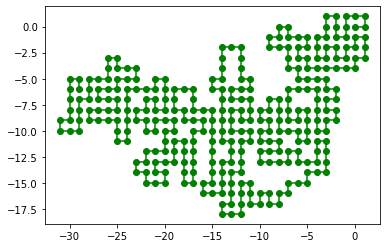

In [7]:
####### Hacemos la representación de la proteína
result= ('MPNSTTVMEFLLMRFSDVWTLQILHSASFFMLYLVTLMGNILIVTVTTCDSSLHMPMYFFLRNLSILDACYISVTVPTSCVNSLLDSTTISKAGCVAQVFLVVFFVYVELLFLTIMAHDRYVAVCQPLHYPVIVNSRICIQMTLASLLSGLVYAGMHTGSTFQLPFCRSNVIHQFFCDIPSLLKLSCSDTFSNEVMIVVSALGVGGGCFIFIIRSYIHIFSTVLGFPRGADRTKAFSTCIPHILVVSVFLSSCSSVYLRPPAIPAATQDLILSGFYSIMPPLFNPIIYSLRNKQIKVAIKKIMKRIFYSENV', 'IENWWSSWNNWSSWSSENESENENESSWSWWWWWNWNENWWNWSWSEESSESEEESESWSESWSWNNNNWWWSSSENESSSWNWWNNNWSWSESWSEESWWSEEENESEENNESSSWWSWWSWSWNWSWNNWSSSWWNENNNENNNENWWNNESENNWWNEENWNNNWWSSSWSESSSSSESSWSSSWWNENNNNNNNWWNNWWSSESEESWSSSSSWNNNNWSSWWSESWWNWNENEENNENWWSWNWNENESENNNWSWWWSSSSSWNNWWWNEEENWWNEENEENWWNWSSWWSSWSSSWWNENNNNES' )
result
dic_coordenadas = get_spatial_dic(result[0], result[1])
coordenadas = list(dic_coordenadas.keys())
#print(coordenadas)

def plot_data(coordenadas):
    xlist=[]
    ylist=[]
    for (xpos,ypos) in coordenadas:
        xlist.append(xpos)
        ylist.append(ypos)
    return(xlist,ylist)
    
data=plot_data(coordenadas)
pyplot.plot(data[0],data[1],'o-', color="green")


In [8]:
####### Representa de color rojo los aa hidrofóbicos y azules los hidrofílicos

In [9]:
def find_hidro(prot, pos_data):
    hidrofi_x=[]
    hidrofi_y=[]
    hidrofo_x=[]
    hidrofo_y=[]
    xpos=pos_data[0]
    ypos=pos_data[1]
    for i in range(0,len(prot)):
        if is_hydrophobic(prot[i]):
            hidrofo_x.append(xpos[i])
            hidrofo_y.append(ypos[i])
        else:
            hidrofi_x.append(xpos[i])
            hidrofi_y.append(ypos[i])
    
    return ([hidrofi_x, hidrofi_y], [hidrofo_x, hidrofo_y])


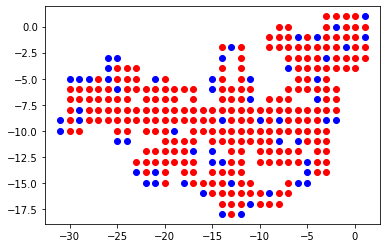

In [11]:
pos_data=plot_data(coordenadas)
res=find_hidro(result[0],pos_data)

hidrofi=res[0]
hidrofo=res[1]

pyplot.plot(hidrofi[0],hidrofi[1],'o', color="blue")
pyplot.plot(hidrofo[0],hidrofo[1],'o', color="red")

In [12]:
#### Lo probamos con insulina
insulin='MALWMRLLPLLALLALWGPDPAAAFVNQHLCGSHLVEALYLVCGERGFFYTPKTRREAEDLQVGQVELGGGPGAGSLQPLALEGSLQKRGIVEQCCTSICSLYQLENYCN'

result2 = simulating_annealing(insulin,100,0.99,300,300)
dic_coordenadas2 = get_spatial_dic(result2[0], result2[1])
coordenadas2 = list(dic_coordenadas2.keys())
data2=plot_data(coordenadas2)
pyplot.plot(data2[0],data2[1],'o-', color="green")

NameError: name 'simulating_annealing' is not defined